# Module 3 Problem Set
### YOUR NAME HERE
_**Due: Friday Sept. 29th, 11:30AM**_
This problemset

## Question 1:
Here, you have performed RT-PCR for an unidentified gene and obtained a cDNA sequence.
You have cloned the cDNA into several clones and sequenced the plasmid in its entirety.

Millions of reads were generated, each representing a small portion of the entire plasmid.

Your coworker performed the sequencing and was kind enough to provide you with the aligned reads without the plasmid sequence in a SAM format.
They also provided you with a GTF file of the region of the genome they thought the gene was located in.

Each read has a unique ID which has been aligned to a certain position in the chromosome.

Your goal is to use these files to confirm the presence of your gene of interest and identify the gene.

Remember that bioinformatics is as much about understanding biological concepts as it is about coding and data analysis.
Use your insights to guide your analysis. Also, make sure to document your code well.
Your peers should be able to understand your logic just by reading your code and comments.

Don't forget to have fun with your data!

First, let's make sure we are ready.
Start by reading the SAM/BAM and GTF format specifications or this week's lecture materials.

**What is the purpose of a SAM file and a GTF file?**

SAM File:

SAM stands for Sequence Alignment/Map format. This type of file is commonly used to store biological sequences aligned to a reference sequence. SAM files are useful in bioinformatics workflows, predominantly in areas such as genomics, where alignment information is crucial.

The format is both human-readable and software-friendly, and it can store alignment information, such as the reference sequence identifiers, alignment positions, mapping quality, and individual base-call qualities. Utilities such as SAMtools can be used to manipulate SAM files for different analyses on aligned sequences.

GTF File:

GTF stands for Gene Transfer Format. This file format is used to hold information about gene structure. It is a refinement of GFF (General Feature Format), with additional conventions and restrictions.

A GTF file uses a tab-delimited format that describes gene structures using nine fields: seqname (reference sequence), source, feature (type of feature), start (start position of the feature), end (end position of the feature), score, strand, frame, and attributes.

These files are widely used as input for a variety of genome annotation tools and browsers. In gene expression analysis, for instance, GTF files can provide the mapping between reads and the gene structures they are derived from.

Start by loading the provided SAM (`data/mysterious.sam`) and GTF (`data/chr19.gtf`) files into pandas DataFrames.
Both files are tab-delimited, so you can use the read_csv() function to load it.
Make sure to assign appropriate column names as per the SAM and GTF format specification.

**You only need to name the first 8 columns of the SAM file.**

**Write two separate functions to do this and print out the first few rows of the DataFrames.**

In [14]:
import pandas as pd


def read_sam(path: str) -> pd.DataFrame:
    df = pd.read_csv(path, sep="\t", header=None)
    df.columns = [
        "name",
        "flag",
        "transcript",
        "pos",
        "mapq",
        "cigar",
        "rnext",
        "pnext",
        "tlen",
        "seq",
    ] + [f"dontcare{i}" for i in range(mysterious.shape[1] - 10)]
    return df


def read_gtf(path: str) -> pd.DataFrame:
    df = pd.read_csv(path, sep="\t", skiprows=5, header=None)
    df.columns = [
        "chr",
        "source",
        "type",
        "start",
        "end",
        "score",
        "strand",
        "phase",
        "attributes",
    ]
    return df


sam = read_sam("data/mysterious.sam")
gtf = read_gtf("data/chr19.gtf")

In [15]:
gtf

,chr,source,type,start,end,score,strand,phase,attributes
0,chr19,HAVANA,gene,5012175,5017027,.,+,.,"gene_id ""ENSMUSG00000024902.6""; gene_type ""pro..."
1,chr19,HAVANA,transcript,5012175,5017027,.,+,.,"gene_id ""ENSMUSG00000024902.6""; transcript_id ..."
2,chr19,HAVANA,exon,5012175,5012543,.,+,.,"gene_id ""ENSMUSG00000024902.6""; transcript_id ..."
3,chr19,HAVANA,CDS,5012421,5012543,.,+,0,"gene_id ""ENSMUSG00000024902.6""; transcript_id ..."
4,chr19,HAVANA,start_codon,5012421,5012423,.,+,0,"gene_id ""ENSMUSG00000024902.6""; transcript_id ..."
...,...,...,...,...,...,...,...,...,...
4761,chr19,HAVANA,exon,6493661,6493678,.,+,.,"gene_id ""ENSMUSG00000033768.18""; transcript_id..."
4762,chr19,HAVANA,CDS,6493661,6493678,.,+,2,"gene_id ""ENSMUSG00000033768.18""; transcript_id..."
4763,chr19,HAVANA,exon,6498285,6498314,.,+,.,"gene_id ""ENSMUSG00000033768.18""; transcript_id..."
4764,chr19,HAVANA,CDS,6498285,6498314,.,+,2,"gene_id ""ENSMUSG00000033768.18""; transcript_id..."


**What does a flag of 16 correspond to in the SAM file?**

A flag of 16 in a SAM file corresponds to "read reverse strand". This means the read is aligned to the reverse strand of the reference sequence. In the context of DNA sequencing, this means that the sequence was derived from the reverse complement strand of the original DNA fragment.


Now let's explore the data.

A SAM file contains the mapping information for each read.
Let's find out where in the genome the reads are mapping to.
**Plot the distribution of the mapping position of all alignments from the SAM file as a histogram.**

**Use the default settings for this plot.**


/Users/chaichontat/mambaforge/envs/quant/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 14512'. Pick better value with 'binwidth'.


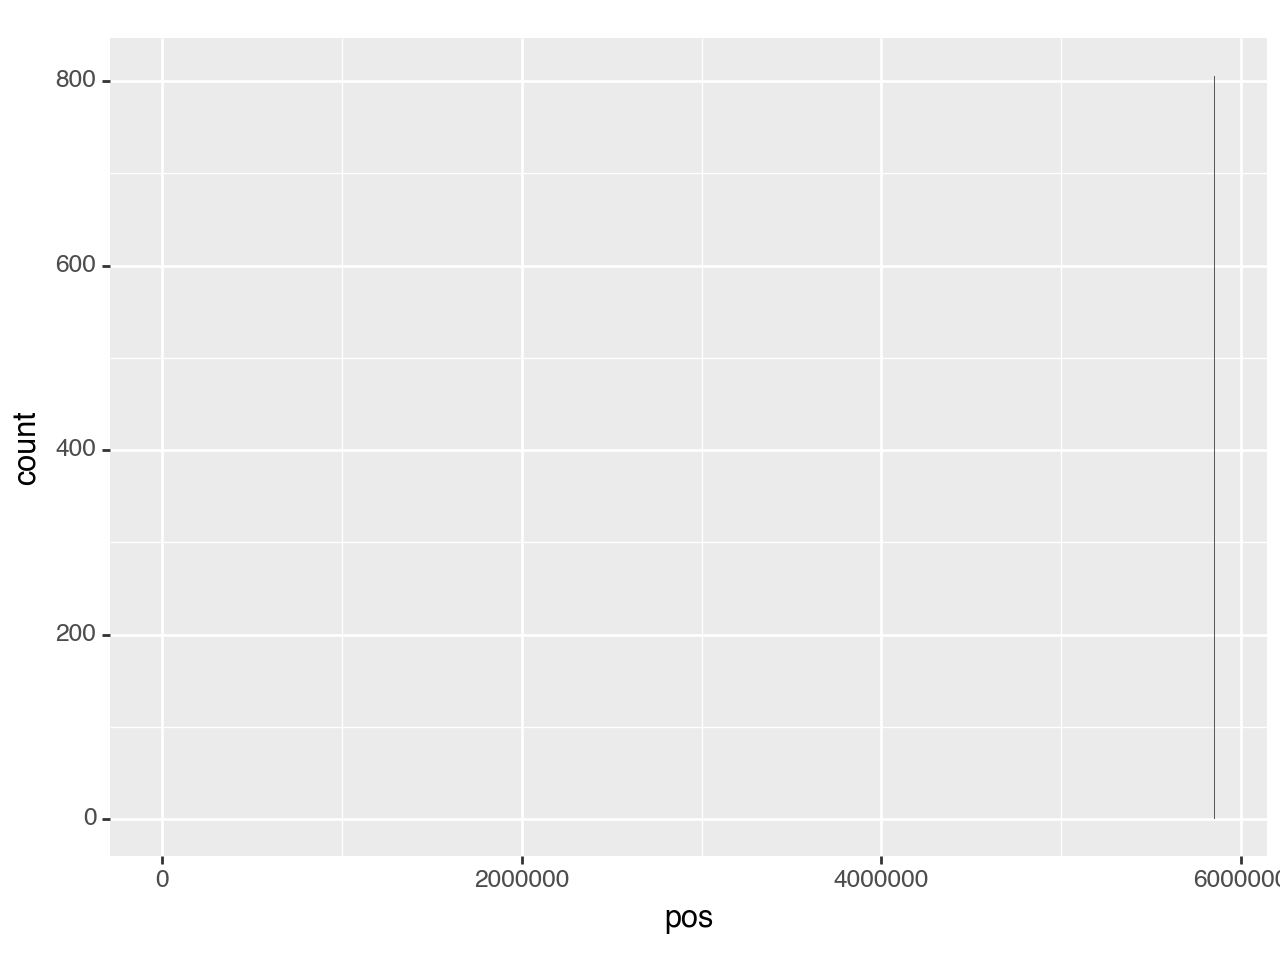

<Figure Size: (640 x 480)>

In [17]:
import plotnine as pn

pn.ggplot(sam, pn.aes(x="pos")) + pn.geom_histogram()

**Is the plot helpful to help answer your question? Why not?**

**Update your code from above to the following cell, making sure that the plot is informative**

Perform any data filtering and plot adjustments as needed.

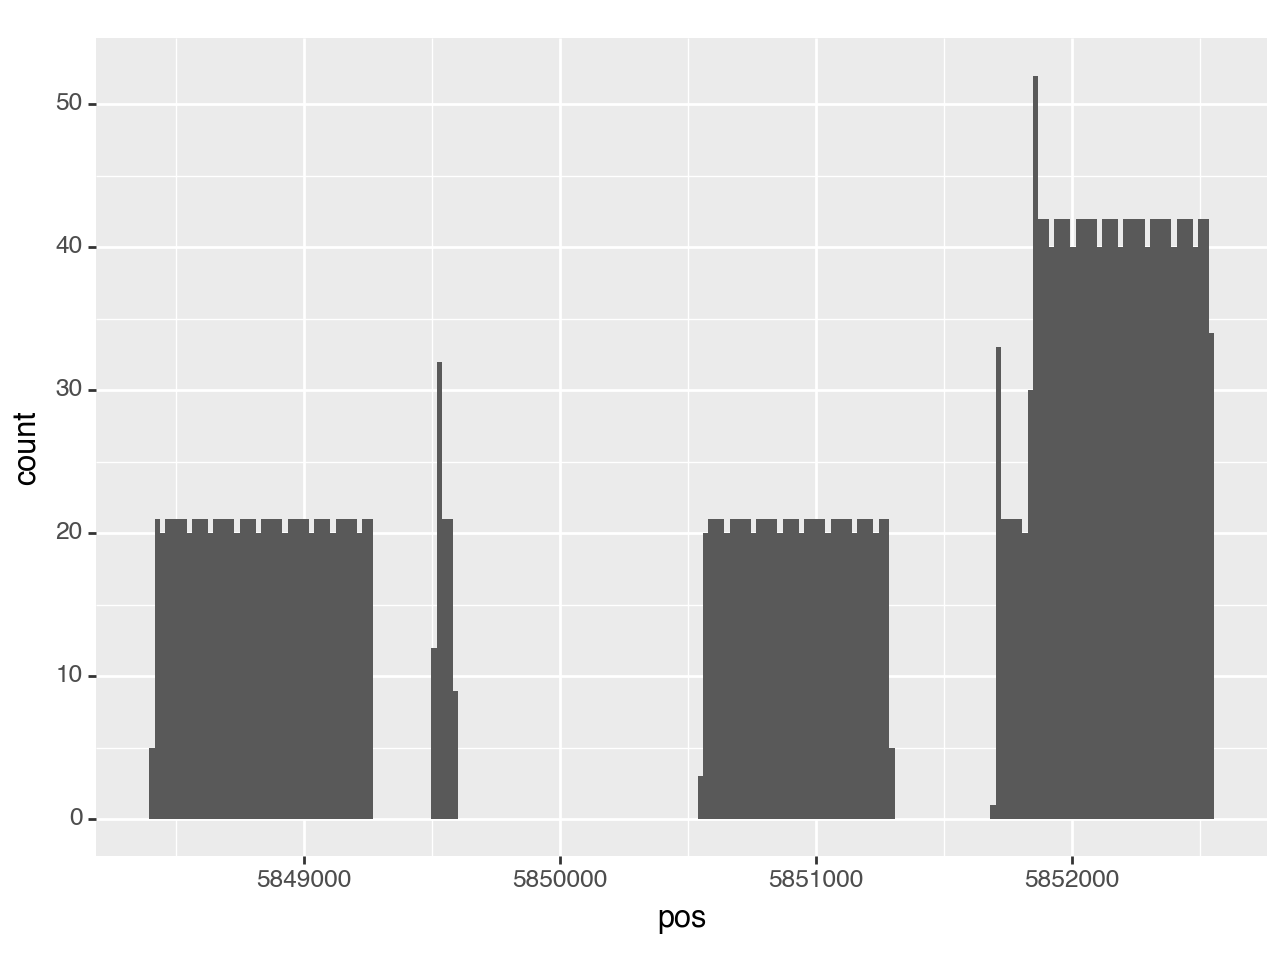

<Figure Size: (640 x 480)>

In [30]:
samf = sam[sam["transcript"] != "*"]
pn.ggplot(samf, pn.aes(x="pos")) + pn.geom_histogram(bins=200)

SAM has some sequences that are not aligned, which are 0. Need to remove those.
Also, need to select an appropriate bin size for the histogram.

**What is the first (smallest integer) position in the genome to which the reads are aligned? What about the last?** (think about the last one carefully)

In [38]:
# Since this is a reverse strand mapping, we need to subtract the length of the read from the first position
samf["pos"].min() - 150, samf["pos"].max()  # length of seq

(5848264, 5852550)

In [39]:
samf[samf["pos"] == samf["pos"].min()]

,name,flag,transcript,pos,mapq,cigar,rnext,pnext,tlen,seq,dontcare0,dontcare1,dontcare2,dontcare3,dontcare4,dontcare5,dontcare6,dontcare7,dontcare8
546,530,16,chr19,5848414,42,150M,*,0,0,TAAATACATACATTCTCTAGTGAAGTATTTTATTAATTTGTATAAT...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:0,XN:i:0,XM:i:0,XO:i:0,XG:i:0,NM:i:0,MD:Z:150,YT:Z:UU



You should see a gap in the mapping.
**Why is there a gap, in the context of this experiment?**

Isoforms

**Approximately, what is the average coverage in the mapped region?**
You can estimate this information from the plot or calculate it from the data.

0, 20, and 40

Finally, using the GTF file, let's find out what gene we have been looking at so far.

**Perform an analysis to determine which gene is presented.**
**Your analysis should be convincing to your friend.**

In [50]:
# Find a feature that encompasses the entire mapped region
section = gtf[(gtf["start"] < samf["pos"].min()) & (samf["pos"].min() < gtf["end"])]
section

,chr,source,type,start,end,score,strand,phase,attributes
2562,chr19,HAVANA,gene,5845717,5852706,.,-,.,"gene_id ""ENSMUSG00000092341.6""; gene_type ""lnc..."
2566,chr19,HAVANA,transcript,5848369,5851218,.,-,.,"gene_id ""ENSMUSG00000092341.6""; transcript_id ..."
2568,chr19,HAVANA,exon,5848369,5849711,.,-,.,"gene_id ""ENSMUSG00000092341.6""; transcript_id ..."


In [51]:
section.iloc[0]["attributes"]

'gene_id "ENSMUSG00000092341.6"; gene_type "lncRNA"; gene_name "Malat1"; level 2; mgi_id "MGI:1919539"; tag "ncRNA_host"; havana_gene "OTTMUSG00000037798.2";'

Use [BLAST](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome) using the sequence from read 42 to further confirm/disprove your results.

**Describe the first two hits from BLAST and how they relate to your results. Which species is this organism?**

In [59]:
sam[sam["name"] == 42]["seq"].iloc[0]

'TAAAGATGCTTTGTCTTCTATTTTCCTATCTTCTCTAACAGCTTTTTCTTCACCTTCCTGTATGTCTTCTTCGTCTTTCACTTCCATTTTCTAATCTTCTTTCTCCAAATACTAGCCTAACCTTTTTGTTTTTTCAAGACAGGGTTTCTC'

In [60]:
# Mus musculus genome assembly, chromosome: 19
# Sequence ID: OX439033.1Length: 59470459Number of Matches: 1
# Range 1: 3875940 to 3876089GenBankGraphicsNext MatchPrevious Match
# Alignment statistics for match #1
# Score	Expect	Identities	Gaps	Strand
# 278 bits(150)	3e-70	150/150(100%)	0/150(0%)	Plus/Plus

# Mus musculus genome assembly, chromosome: 19
# Sequence ID: OX390162.1Length: 59306578Number of Matches: 1
# Range 1: 3921117 to 3921266GenBankGraphicsNext MatchPrevious Match
# Alignment statistics for match #1
# Score	Expect	Identities	Gaps	Strand
# 278 bits(150)	3e-70	150/150(100%)	0/150(0%)	Plus/Plus

Bonus: There irregularities in the mapping that is not expected from a cloned gene. Specifically, there is a significant difference in coverage across different aligned regions. What could be the cause of that, considering this experiment?

This is a mixture of two isoforms. Cross-contamination between two bacteria clones. Your clone is not a clone.

## Question 2:

a. Design a Python class named `SeqRead` that takes the following attributes:
- `read_id` (a unique identifier for the read, e.g. 'R1','R2')
- `chromosome` (the chromosome from which the read originates, e.g. 'chr1','chr2')
- `start_position` (the starting base pair position of the read on the chromosome, an integer)
- `end_position` (the ending base pair position of the read on the chromosome, an integer)

This class should have a method to return the `length` of the read, and also a method called `__str__` that prints the read in the following format:
```
Read [read_id] originates from [chromosome] and spans from position [start_position] to [end_position]
```

**You will be also be scored based on proper typing of your function arguments.**
 (i.e. `def hello(name: str) -> str: `)


In [62]:
class SeqRead:
    def __init__(
        self, read_id: str, chromosome: str, start_position: int, end_position: int
    ) -> None:
        self.read_id = read_id
        self.chromosome = chromosome
        self.start_position = int(start_position)
        self.end_position = int(end_position)

    def __len__(self) -> int:
        return self.end_position - self.start_position

    def __str__(self) -> str:
        return f"Read {self.read_id} originates from {self.chromosome} and spans from position {self.start_position} to {self.end_position}"

Create a list of four `SeqRead` objects with the following information:
- 'R101', 'chr1', 1000, 1100
- 'R202', 'chr1', 1050, 1150
- 'R303', 'chr2', 2000, 2250
- 'R404', 'chr2', 2100, 2400

After creating the list, create a for-loop that prints each read in the list using `str(YOUR_OBJECT)`.

In [70]:
argss = [
    ["R101", "chr1", 1000, 1100],
    ["R202", "chr1", 1050, 1150],
    ["R303", "chr2", 2000, 2250],
    ["R404", "chr2", 2100, 2400],
]

seqs = [SeqRead(*args) for args in argss]  # me being lazy
[str(seq) for seq in seqs]

['Read R101 originates from chr1 and spans from position 1000 to 1100',
 'Read R202 originates from chr1 and spans from position 1050 to 1150',
 'Read R303 originates from chr2 and spans from position 2000 to 2250',
 'Read R404 originates from chr2 and spans from position 2100 to 2400']

BONUS: Create a function that takes in two SeqRead objects.

that takes as an argument another instance of `SeqRead` and calculates and returns the number of overlapping base pairs between the two reads.
The method should return the number of overlapping bases if the reads aree on the same chromosome,
and it should return `-1` if they are on different chromosomes.

Demonstrate the use of this new method by calculating the overlap between all pairs of the above reads

In [76]:
from itertools import combinations


def overlaps_with(a: SeqRead, b: SeqRead) -> int:
    """Return the number of bases that overlap between two reads."""
    if a.chromosome != b.chromosome:
        return -1

    start = max(a.start_position, b.start_position)
    end = min(a.end_position, b.end_position)

    overlap = end - start + 1  # Probably inclusive ends
    return max(0, overlap)  # Return 0 if there is no overlap


[
    print(
        a.chromosome,
        (a.start_position, a.end_position),
        b.chromosome,
        (b.start_position, b.end_position),
        overlaps_with(a, b),
    )
    for a, b in combinations(seqs, 2)
]

chr1 (1000, 1100) chr1 (1050, 1150) 51
chr1 (1000, 1100) chr2 (2000, 2250) -1
chr1 (1000, 1100) chr2 (2100, 2400) -1
chr1 (1050, 1150) chr2 (2000, 2250) -1
chr1 (1050, 1150) chr2 (2100, 2400) -1
chr2 (2000, 2250) chr2 (2100, 2400) 151


[None, None, None, None, None, None]

## Question 3:
Using the Hippo-Seq bulk RNA-seq data used in module 2 and 3,

- [GSE74985](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE74985)
- Cembrowski MS, Wang L, Sugino K, Shields BC et al. Hipposeq: a comprehensive RNA-seq database of gene expression in hippocampal principal neurons. Elife 2016 Apr 26;5:e14997. PMID: [27113915](https://www.ncbi.nlm.nih.gov/pubmed/27113915)

Create an 'AnnData' object from these data.

Start by reading in the three files that we need to create the `AnnData` object:
 - The gene expression matrix `X` (`data/GSE74985_data.csv`) 
 - The sample information `obs` (`data/GSE74985_sample_info.csv`)
 - The gene information `var` (`data/GSE74985_gene_info.csv`)

Reminder, each of these files can be read in as a `pandas` `DataFrame`.
For the gene expression matrix, you will need to transpose (`.T`) the imported data from a 'gene X sample' matrix to a 'sample X gene' matrix.

_Hint, you may need `X.index.name = "sample"`_

Once you've imported the data, create the `AnnData` object.  (This should be done exactly as was indicated in the Module3 notebook).

If you do not have `anndata`, install it with `mamba install anndata`.

In [82]:
import pandas as pd
import anndata as ad

X = pd.read_csv("data/GSE74985_data.csv", index_col=0)
sample=  pd.read_csv("data/GSE74985_sample_info.csv", index_col=0)
gene = pd.read_csv("data/GSE74985_gene_info.csv", index_col=0)

adata = ad.AnnData(X=X.T, obs=sample, var=gene)
adata

AnnData object with n_obs × n_vars = 24 × 37699
    obs: 'tissue', 'position', 'replicate'
    var: 'gene_id_version', 'chr', 'start', 'end', 'strand', 'gene_biotype', 'gene_name', 'gene_id_short'

Subset this data to only include samples from CA3 tissue and save the subsetted data as a new anndata object.

In [86]:
ca3 = adata[adata.obs['tissue'] == "ca3"].copy()

In this new subsetted anndata object, create a new column in the `.var` dataframe called `gene_mean` that stores the mean expression of each gene.

_Remember the expression data is stored in `adata.X`_


In [87]:
ca3.var['gene_mean'] = ca3.X.mean(axis=0)

How many genes have a mean expression > 3 in the CA3 tissue samples? _Remember, the `.var` attribute of an anndata object is just a pandas dataframe._

In [94]:
gm = ca3.var['gene_mean']
sum(gm > 3)

9245

What are the top 10 protein coding (stored in 'gene_biotype' of the _.var_ dataframe) genes with the highest mean gene expression in the CA3 samples? Hint: `pd.sort_values()` might be useful

In [96]:
gm.sort_values(ascending=False)[:10]

gene_id
ENSMUSG00000036438    4046.776667
ENSMUSG00000035202    2966.368333
ENSMUSG00000027273    2443.725000
ENSMUSG00000025393    2317.313333
ENSMUSG00000001175    2213.951667
ENSMUSG00000021087    2008.783333
ENSMUSG00000022285    1731.900000
ENSMUSG00000032532    1654.811667
ENSMUSG00000092341    1602.342667
ENSMUSG00000018965    1527.823333
Name: gene_mean, dtype: float64